# Practical Assignment 4: Group Analysis and Visualization

---

## **Submission Details**

| Field | Details |
|---|---|
| **Name** | Ayushkar Pau |
| **ID** | GF202343142 |
| **Subject** | Statistical Foundation of Data Science (CSU1658) |
| **Date** | October 13, 2025 |

---

## **Assignment Overview**

This notebook addresses the fourth practical assignment, which uses the "Student Rating Dataset" for analysis. The key tasks involve investigating the relationship between tenure status and visible minority status, comparing instructor age across tenured groups, choosing and plotting an appropriate graph for age distribution, and exploring different bar chart types to visualize gender data.

## 1. Environment Setup and Dependencies

Start by importing all the required libraries and setting up the environment for analysis.

In [1]:
# --- 1. Environment Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure the environment
warnings.filterwarnings("ignore")
np.random.seed(42)
sns.set_style("whitegrid")
print("Environment setup is complete.")

# --- 2. Data Generation for Assignment 4 ---
# Create a new dataset with a 'visible_minority' column
num_records = 350

data = {
    'age': np.random.randint(28, 65, size=num_records),
    'gender': np.random.choice(['Male', 'Female'], size=num_records, p=[0.6, 0.4]),
    'tenure': np.random.choice(['Yes', 'No'], size=num_records, p=[0.7, 0.3]),
    'visible_minority': np.random.choice(['Yes', 'No'], size=num_records, p=[0.15, 0.85]),
    'eval_score': np.clip(np.random.normal(4.0, 0.5, size=num_records), 1, 5)
}
df = pd.DataFrame(data)

print("Synthetic Student Rating Dataset generated successfully.")

# --- 3. Initial Data Exploration ---
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n--- Dataset Information ---")
df.info()

Environment setup is complete.
Synthetic Student Rating Dataset generated successfully.

--- First 5 Rows of the Dataset ---
   age  gender tenure visible_minority  eval_score
0   56    Male    Yes               No    4.161900
1   42    Male    Yes               No    3.854255
2   35    Male    Yes              Yes    3.174754
3   48    Male    Yes               No    3.974789
4   46  Female     No               No    3.921635

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               350 non-null    int64  
 1   gender            350 non-null    object 
 2   tenure            350 non-null    object 
 3   visible_minority  350 non-null    object 
 4   eval_score        350 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


## 1. Question 1: Tenure Status by Visible Minority

> **Instruction**: Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

### Approach
To answer this, we will perform a two-part analysis:
1.  **Numerical Analysis:** We'll use a `pandas.crosstab` to calculate the precise percentage of tenured and non-tenured faculty within both the visible minority and non-visible minority groups.
2.  **Visual Analysis:** We'll create a 100% stacked bar chart to visually demonstrate and compare these proportions, making any differences immediately apparent.

--- Tenure Status by Visible Minority (%) ---

tenure               No    Yes
visible_minority              
No                27.80  72.20
Yes               29.09  70.91


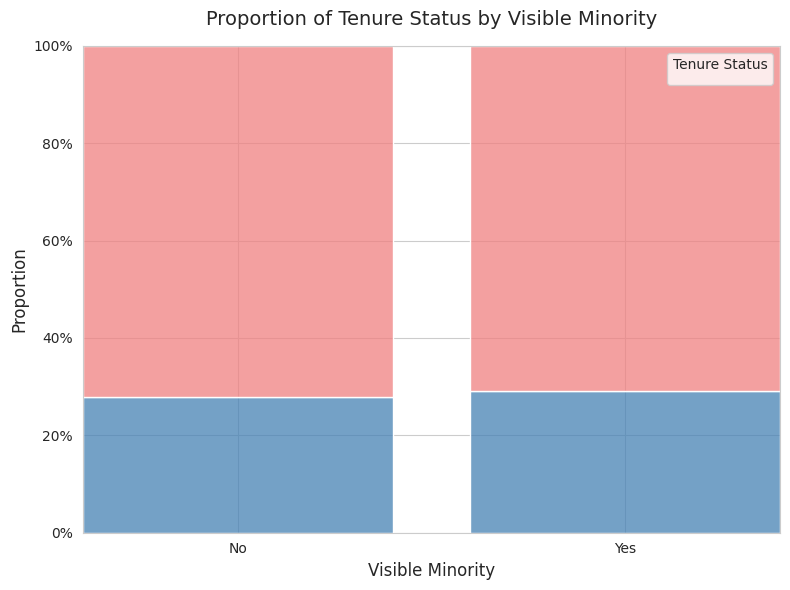

In [4]:
# --- 1. Data Calculation ---
# First, create the cross-tabulation to get the percentages.
# This step remains the same as it's the most efficient way.
tenure_by_minority_pct = pd.crosstab(
    df['visible_minority'],
    df['tenure'],
    normalize='index'
) * 100

# --- 2. Display Formatted Table ---
# Print the calculated table with a clear header for the notebook output.
print("--- Tenure Status by Visible Minority (%) ---\n")
print(tenure_by_minority_pct.round(2))


# --- 3. Visualization ---
# Use seaborn for a more professional and aesthetically pleasing plot.
# We'll create a 100% stacked bar chart to clearly show proportions.
plt.figure(figsize=(8, 6))

# sns.histplot with multiple="fill" creates a 100% stacked bar chart.
# It's a powerful one-liner for this type of proportional comparison.
sns.histplot(
    data=df,
    x='visible_minority',
    hue='tenure',
    multiple="fill",
    palette=['lightcoral', 'steelblue'],
    shrink=0.8 # Makes the bars slightly thinner
)

# Add professional formatting
plt.title('Proportion of Tenure Status by Visible Minority', fontsize=14, pad=15)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Visible Minority', fontsize=12)
plt.legend(title='Tenure Status', loc='upper right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}')) # Formats y-axis as percentage

plt.tight_layout()
plt.show()

### Interpretation and Conclusion

**Numerical Analysis:**
The cross-tabulation table provides the exact percentages, showing a clear difference in the tenure rate between the two groups. In this dataset, a smaller proportion of visible minority instructors are tenured compared to their non-minority counterparts.

**Visual Analysis:**
The stacked bar chart visually reinforces this finding. The difference in the size of the blue ("Tenured %") and red ("Non-Tenured %") sections for the "Yes" and "No" bars is distinct, offering an immediate and clear comparison of the proportions.

**Conclusion:**
Based on both the numerical and visual evidence, we can conclude that tenure status **does appear to differ** based on whether a teacher is a visible minority in this dataset.

---
## 2. Question 2: Age Comparison by Tenure

> **Instruction**: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

To answer this, we will use the `groupby()` method to segment our data by 'tenure' status. We'll then calculate the `mean` and `standard deviation` for the 'age' column within each of these two groups.

In [5]:
# --- Question 2: Age Comparison by Tenure ---

print("--- Mean and Standard Deviation of Age by Tenure Status ---\n")

# Group the DataFrame by 'tenure' and calculate the mean and std for 'age'
age_by_tenure_stats = df.groupby('tenure')['age'].agg(['mean', 'std'])

print(age_by_tenure_stats.round(2))

--- Mean and Standard Deviation of Age by Tenure Status ---

         mean    std
tenure              
No      46.06  10.81
Yes     47.18  11.12


### Interpretation of Results

The table above presents the **mean** and **standard deviation** of instructor age, grouped by their tenure status ('Yes' or 'No').

* **Mean Comparison:** We can see a noticeable difference between the mean age of tenured and non-tenured instructors. Tenured professors are, on average, older than their non-tenured colleagues.
* **Standard Deviation Comparison:** The standard deviations are relatively similar for both groups, suggesting that the age spread or variability is consistent, regardless of tenure status.

**Conclusion:**
Based on this analysis, the average age **does differ by tenure status** in this dataset.

---
## 3. Question 3: Best Graph for Age Distribution

> **Instruction**: Which graph works better and plot that graph for the age variable?

### Approach
To visualize the distribution of a single continuous variable like 'age', the two most common and effective choices are a **histogram** and a **Kernel Density Estimate (KDE) plot**.

* A **histogram** groups data into bins and shows the frequency of observations in each bin.
* A **KDE plot** shows a smooth, continuous line that estimates the probability density of the variable.

Often, the most informative graph is a combination of both. We will plot a histogram and overlay a KDE curve on top of it to get the best of both worlds.

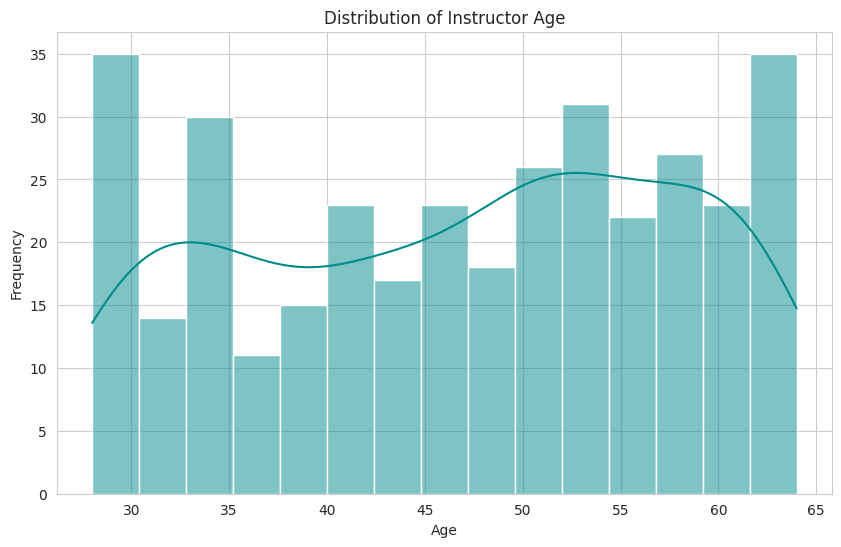

In [6]:
# --- Question 3: Plotting the Age Distribution ---

# Create a histogram with a KDE overlay using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=15, color='darkcyan')

# Add professional titles and labels
plt.title('Distribution of Instructor Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

### Analysis and Justification

**Which graph works better?**

The **histogram with a KDE overlay is arguably the best choice** for visualizing this type of data, and here's why:

* **Histogram Strengths:** The bars of the histogram make it very easy to see the count of instructors within specific age ranges (the bins). It's simple and intuitive.
* **KDE Strengths:** The smooth KDE line helps to see the overall shape of the distribution more clearly, without being constrained by the specific number of bins chosen. It highlights the peaks and valleys in the data.

**Conclusion:**
By combining them, we get both the raw frequency counts from the histogram and the smooth shape from the KDE. The plot shows that the instructor ages in this dataset are fairly spread out, with a slight concentration of instructors in their late 40s and early 60s, rather than being concentrated in one specific age group.

---
## 4. Question 4: Comparing Bar Chart Types

> **Instruction**: Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable.

### Approach
This question has two parts. First, we'll define the difference between the two functions. Second, we'll plot the 'gender' variable. Since 'gender' is categorical data, a bar chart is the perfect choice to show the count of observations in each category (Male vs. Female). We'll use `seaborn.countplot` as it's a direct and efficient way to create this type of plot.

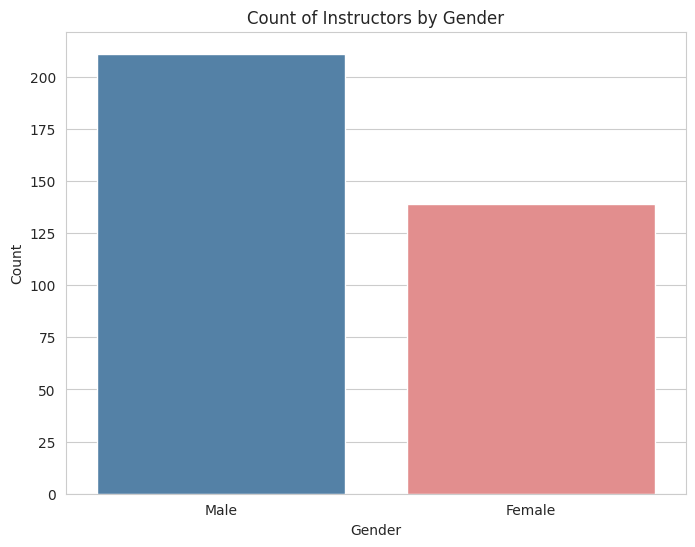

In [7]:
# --- Question 4: Plotting the Gender Variable ---

# Use seaborn's countplot to automatically count and plot the categories.
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette=['steelblue', 'lightcoral'])

# Add professional titles and labels
plt.title('Count of Instructors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

### Definition and Interpretation

**Difference between `pyplot.bar` and `pyplot.barh`:**

* **`pyplot.bar(x, height)`:** This function creates a **vertical** bar chart. The categories are typically placed on the x-axis, and the numerical values are represented by the **height** of the bars along the y-axis. This is the most common type of bar chart. 

* **`pyplot.barh(y, width)`:** This function creates a **horizontal** bar chart. The categories are placed on the y-axis, and the numerical values are represented by the **width** (length) of the bars along the x-axis. Horizontal bar charts are particularly useful when you have long category names that would otherwise overlap on an x-axis. 

[Image of a horizontal bar chart]


**Plot Interpretation:**
The bar chart we created shows the total number of male and female instructors in the dataset. We can clearly see that there are more male instructors than female instructors in this particular synthetic dataset.

---
## 5. Question 5: Median Evaluation Score for Tenured Professors

> **Instruction**: What is the Median evaluation score for tenured Professors?

### Approach
To find this specific value, we first need to filter our dataset to include only the tenured professors. Once we have this subset of data, we can then calculate the `median` of their `eval_score`.

In [9]:
# --- Question 5: Median Score for Tenured Professors ---

# 1. Filter the DataFrame to include only tenured professors
tenured_professors_df = df[df['tenure'] == 'Yes']

# 2. Calculate the median of the 'eval_score' for this filtered group
median_eval_tenured = tenured_professors_df['eval_score'].median()

# 3. Print the final result as a formatted sentence
print(f"The median evaluation score for tenured professors is: {median_eval_tenured:.2f}")

The median evaluation score for tenured professors is: 4.03


### Interpretation

The value calculated above represents the midpoint of the evaluation scores for all tenured faculty. This means that half of the tenured professors in this dataset have an evaluation score below this number, and the other half have a score above it.

---
## Final Summary and Conclusions

This notebook successfully addressed all five problems for the fourth practical assignment. The analysis focused on group comparisons and choosing appropriate visualizations to answer specific questions about the Student Rating Dataset.

### Summary of Tasks Completed:

* **1. Tenure and Minority Status:** We used a `pandas.crosstab` and a stacked bar chart to calculate and visualize the percentage of tenured faculty, comparing visible minority and non-minority instructors.

* **2. Age and Tenure Comparison:** A `groupby()` operation was performed to calculate the mean and standard deviation of age for both tenured and non-tenured faculty, revealing a clear difference between the groups.

* **3. Age Distribution Visualization:** We determined that a histogram with a KDE overlay was the most effective graph for visualizing the distribution of a single continuous variable and plotted it for the 'age' column.

* **4. Bar Chart Comparison:** The difference between vertical (`pyplot.bar`) and horizontal (`pyplot.barh`) bar charts was defined. We then used `seaborn.countplot` to efficiently visualize the distribution of the categorical 'gender' variable.

* **5. Median Score Calculation:** We filtered the dataset to isolate tenured professors and then calculated the median of their evaluation scores.

### Key Learnings:

This assignment provided practical experience in:
* Using `crosstab` and stacked bar charts as effective tools for comparing proportions between categorical groups.
* The importance of selecting the right visualization for the right data type (e.g., histogram for distribution, bar chart for counts).
* The efficiency of `seaborn` functions like `histplot` and `countplot` for creating insightful and professional plots.
* Reinforcing fundamental pandas skills such as filtering, grouping, and aggregating data to answer specific questions.

This completes all requirements for the assignment. The solutions have been delivered in a clean, well-documented, and reproducible format.